In [1]:
from training_script import training_loop
import h5py
from mymodels import CoarseNet
import os
import torch 
import skimage.io as skio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_print_images_callback(fixed_idx,num_random):
    def print_images_callback(model,dataset):
        print("Performance on random pics")
        print("##"*50)
        random_pic=fixed_idx
        num_samples=dataset["hazy_image"].shape[0]
        for j in range(0,num_random+1):
            t_batch=dataset["trans_map"][random_pic,:,:]
            h_batch=dataset["hazy_image"][random_pic:random_pic+1,:,:,:]
            t_pred=model(torch.from_numpy(h_batch))
            t_pred_npy=t_pred.detach().numpy()[0,:,:]
            plt.figure()
            _=skio.imshow(t_pred_npy)
            plt.show()
            print("##"*50)
            random_pic=np.random.randint(0,num_samples)
    return print_images_callback

In [7]:
args={
    "num_epochs":50,
    "checkpoint":10,
    "grad_sim":True,
    "scaling_coefficient":1000,
    "patch_size":1,
    "batch_size":100,
    "lr_initial":0.01,
    # for our experiments we use a fixed LR
    "lr_decay_factor":0.1,
    "lr_decay_interval":100,
    "momentum":0.9,
    "l2_weight_decay":5e-04,
    "run_dir":"./saved_models/test"
    }

In [8]:
dir_path=args["run_dir"]
if os.path.exists(dir_path):
    assert(os.path.isdir(dir_path))
else:
    os.makedirs(dir_path)

In [9]:
logfilename=args["run_dir"]+"/log.txt"
with open(logfilename,"a+") as fi:
    fi.write(str(args)+"\n")
dataset = h5py.File("../data/nyu_hazy_trn.mat","r")
model=CoarseNet()

Epoch # 0
aux_loss is in alignment
Epoch # 0, Minibatch # 0, Loss :  0.08131213
aux_loss is in alignment
Epoch # 0, Minibatch # 1, Loss :  0.07509255
aux_loss is in alignment
Epoch # 0, Minibatch # 2, Loss :  0.07974878
aux_loss is in alignment
Epoch # 0, Minibatch # 3, Loss :  0.07336261
aux_loss is in alignment
Epoch # 0, Minibatch # 4, Loss :  0.07147051
aux_loss is in alignment
Epoch # 0, Minibatch # 5, Loss :  0.07614028
aux_loss is in alignment
Epoch # 0, Minibatch # 6, Loss :  0.06533657
aux_loss is in alignment
Epoch # 0, Minibatch # 7, Loss :  0.06050318
aux_loss is in alignment
Epoch # 0, Minibatch # 8, Loss :  0.06074781
aux_loss is in alignment
Epoch # 0, Minibatch # 9, Loss :  0.055785302
aux_loss is in alignment
Epoch # 0, Minibatch # 10, Loss :  0.05060733
aux_loss is in alignment
Epoch # 0, Minibatch # 11, Loss :  0.049055055
aux_loss is in alignment
Epoch # 0, Minibatch # 12, Loss :  0.04001973
aux_loss is in alignment
Epoch # 0, Minibatch # 13, Loss :  0.04038015
aux_

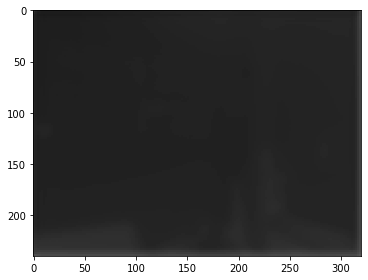

####################################################################################################


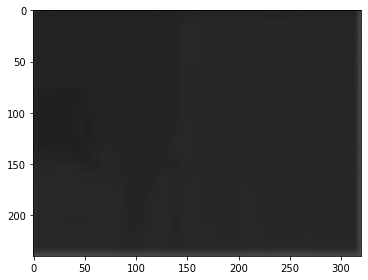

####################################################################################################


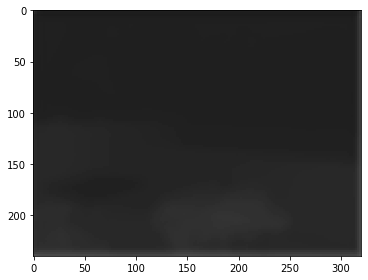

####################################################################################################
Epoch # 1
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 0, Loss :  0.019318985
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 1, Loss :  0.018312858
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 2, Loss :  0.018535884
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 3, Loss :  0.020673208
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 4, Loss :  0.018534834
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 5, Loss :  0.017103406
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 6, Loss :  0.018503308
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 7, Loss :  0.018349964
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 8, Loss :  0.017283857
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 9, Loss :  0.021215199
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 10, Loss :  0.017243184
aux_loss is NOT in alignment
Epoch # 1, Minibatch # 11, Loss : 

KeyboardInterrupt: 

In [10]:
training_loop(model=model,dataset=dataset,
              training_callback=get_print_images_callback(10,2),**args)